In [1]:
from qiskit import *
from qiskit.circuit.library.standard_gates import XGate
from qiskit.circuit.quantumregister import QuantumRegister
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
import random

def circuit_A():
    #adder,f0~f3  g0~g3 aux(4 qbits)
    qc = QuantumCircuit(12)
    qc.cx(0,1)
    qc.cx(2,3)
    qc.cx(4,5)
    qc.cx(6,7)
    qc.ccx(1,5,9)
    qc.ccx(3,7,10)
    qc.cx(0,2)
    qc.cx(4,6)                               #F_24multiplication       Mul
    qc.cx(9,11)
    qc.cx(1,3)
    qc.cx(5,7)
    qc.cx(10,9)
    qc.cx(0,1)
    qc.cx(4,5)
    qc.ccx(2,6,10)
    qc.ccx(1,5,8)
    qc.cx(8,9)
    qc.cx(10,11)
    qc.ccx(0,4,8)
    qc.ccx(3,7,11)
    qc.cx(2,3)
    qc.cx(6,7)
    qc.cx(8,10)
    qc.ccx(3,7,8)
    qc.cx(0,2)
    qc.cx(4,6)
    qc.cx(8,9)
    qc.cx(1,3)
    qc.cx(5,7)
    qc.ccx(2,6,8)
    qc.cx(8,11)
    qc.ccx(3,7,8)
    return qc

def circuit_F():
    #adder,f0~f3  g0~g3 aux(4 qbits)
    qc = QuantumCircuit(12)
    qc.cx(10,9)
    qc.cx(8,10)
    qc.cx(9,11)
    qc.cx(8,9)
    qc.cx(10,11)
    
    qc.cx(0,1)
    qc.cx(2,3)
    qc.cx(4,5)
    qc.cx(6,7)
    qc.ccx(1,5,9)
    qc.ccx(3,7,10)
    qc.cx(0,2)
    qc.cx(4,6)
    qc.cx(9,11)
    qc.cx(1,3)                                 #F_24 multiplication    B_Mul
    qc.cx(5,7)
    qc.cx(10,9)
    qc.cx(0,1)
    qc.cx(4,5)
    qc.ccx(2,6,10)
    qc.ccx(1,5,8)
    qc.cx(8,9)
    qc.cx(10,11)
    qc.ccx(0,4,8)
    qc.ccx(3,7,11)
    qc.cx(2,3)
    qc.cx(6,7)
    qc.cx(8,10)
    qc.ccx(3,7,8)
    qc.cx(0,2)
    qc.cx(4,6)
    qc.cx(8,9)
    qc.cx(1,3)
    qc.cx(5,7)
    qc.ccx(2,6,8)
    qc.cx(8,11)
    qc.ccx(3,7,8)
    return qc

def circuit_B():
    # m -> m^2 * lambda   Fig.14
    qc = QuantumCircuit(4)
    qc.cx(1,2)
    qc.cx(0,1)                                      
    qc.cx(1,3)    
    qc.swap(0,2)
    qc.swap(1,2)
    qc.swap(2,3)
    return qc


def circuit_D():
    #x0~3, aux(1 qbits)   F_24 multiplicative inversion
    qc = QuantumCircuit(5)
    qc.swap(1,3)
    qc.swap(1,2)
    qc.ccx(3,2,1)
    qc.ccx(3,1,0)
    qc.cx(1,0)
    qc.ccx(0,2,3)
    qc.cx(3,2)
    qc.cx(2,1)                                                       #F_24inv_0
    qc.ccx(0,1,3)
    qc.ccx(3,2,4)
    qc.ccx(4,1,0)
    qc.ccx(3,2,4)
    qc.ccx(1,3,2)
    qc.cx(1,3)
    qc.cx(3,0)
    qc.swap(1,3)
    return qc


def circuit_Q():
    #x0~3, aux(1 qbits)   F_24 multiplicative inversion
    qc = QuantumCircuit(5)
    qc.swap(1,3)
    qc.swap(1,2)
    qc.ccx(3,2,1)
    qc.ccx(3,1,0)
    qc.cx(1,0)
    qc.ccx(0,2,3)
    qc.cx(3,2)
    qc.cx(2,1)
    qc.ccx(0,1,3)
    qc.ccx(3,2,4)                                          #F_24inv_1
    qc.ccx(4,1,0)
    qc.ccx(3,2,4)
    qc.ccx(4,1,0)
    qc.ccx(1,3,2)
    qc.cx(1,3)
    qc.cx(3,0)
    qc.swap(1,3)
    return qc



def circuit_M(): #xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
    qc = QuantumCircuit(8)
    qc.cx(5,1)
    qc.cx(6,0)
    qc.cx(5,3)
    qc.cx(6,1)
    qc.cx(6,2)
    qc.cx(5,4)
    qc.cx(2,1)
    qc.cx(2,0)
    qc.cx(6,5)
    qc.cx(3,1)                        #M   
    qc.cx(0,4)
    qc.cx(1,6)
    qc.cx(0,6)
    qc.cx(1,7)
    qc.cx(0,2)
    qc.swap(1,3)
    qc.swap(1,4)
    qc.swap(2,5)
    qc.swap(2,6)
    return qc

def circuit_A_Minverse(): #xxxxxxxxxxxxxxxxxxxxxxxx
    #A*M^(-1)
    qc = QuantumCircuit(8)
    qc.cx(4,1)
    qc.cx(5,0)
    qc.cx(6,2)
    qc.cx(4,0)
    qc.cx(6,1)
    qc.cx(7,2)
    qc.cx(4,2)
    qc.cx(6,3)
    qc.cx(7,1)
    qc.cx(1,0)
    qc.cx(6,4)
    qc.cx(3,0)
    qc.cx(7,6)
    qc.cx(2,1)
    qc.cx(3,2)
    qc.cx(1,7)
    qc.cx(0,4)
    qc.cx(0,7)
    qc.cx(1,4)
    qc.cx(0,6)
    qc.cx(1,5)
    qc.cx(0,3)
    qc.cx(5,7)
    qc.cx(0,1)
    qc.cx(2,3)                         #AM^(-1)    
    qc.cx(4,5)
    qc.swap(1,2)
    qc.swap(2,4)
    qc.swap(4,3)
    qc.swap(4,6)
    qc.swap(5,7)
    #换线
    qc.swap(0,4)
    qc.swap(1,5)
    qc.swap(2,6)
    qc.swap(3,7)
    return qc

In [2]:
def p_17(): 
    #8,8,6 F' = G' = A (Ma)-1
    p_17_circuit = QuantumCircuit(12)
    qreg = p_17_circuit.qregs[0]
    c4x_gate = XGate().control(4) #c4x
    for i in range(4):
        p_17_circuit.cx(i,4+i)
    p_17_circuit.barrier(range(12))
    p_17_circuit.append(circuit_A(),qreg[0:12:1])
    p_17_circuit.barrier(range(12))
    for i in range(4):
        p_17_circuit.cx(i,4+i)
    p_17_circuit.barrier(range(12))
    #B cx B^dagger
    p_17_circuit.append(circuit_B(),qreg[4:8:1])
    #multi_inverse_circuit.barrier(range(12))
    for i in range(4):
        m=4 #4-7bits control 8-11bits
        p_17_circuit.cx(m+i,8+i)
    p_17_circuit.append(circuit_B().inverse(),qreg[4:8:1]) 
    return p_17_circuit

def in_mul(): 
    #8,8,6 F' = G' = A (Ma)-1
    in_mul_circuit = QuantumCircuit(12)                             #circuit In-Mul
    qreg = in_mul_circuit.qregs[0]
    in_mul_circuit.append(circuit_A(),qreg[0:12:1])
    in_mul_circuit.append(circuit_Q(),qreg[4:9:1])
    in_mul_circuit.append(circuit_A().inverse(),qreg[8:12:1]+qreg[4:8:1]+qreg[0:4:1])
    in_mul_circuit.swap(0,8)
    in_mul_circuit.swap(1,9)
    in_mul_circuit.swap(2,10)
    in_mul_circuit.swap(3,11)
    in_mul_circuit.append(circuit_D(),qreg[4:9:1])
    return in_mul_circuit


def multi_inverse_1(): 
    multi_inverse_circuit = QuantumCircuit(20)
    qreg = multi_inverse_circuit.qregs[0]
    c4x_gate = XGate().control(4) 
    multi_inverse_circuit.append(p_17(),qreg[0:12:1])                           #Fig.4
    for i in range(4):                                                      
        m=4 #4-7bits control 0-3bits
        multi_inverse_circuit.cx(m+i,0+i)
    multi_inverse_circuit.append(circuit_D().inverse(),qreg[8:13:1])
    multi_inverse_circuit.append(circuit_A(),qreg[0:4:1]+qreg[8:12:1]+qreg[12:16:1]) #F'
    multi_inverse_circuit.append(circuit_A(),qreg[4:8:1]+qreg[8:12:1]+qreg[16:20:1]) #G'
     #cx
    for i in range(4):
        m=4 #4-7bits control 0-3bits
        multi_inverse_circuit.cx(m+i,0+i)
    multi_inverse_circuit.append(p_17().inverse(),qreg[12:20:1]+qreg[8:12:1])
    return multi_inverse_circuit



def multi_inverse_2(): 
    multi_inverse_circuit = QuantumCircuit(20)
    qreg = multi_inverse_circuit.qregs[0]
    c4x_gate = XGate().control(4) #c4x
    multi_inverse_circuit.append(p_17(),qreg[0:12:1])                       
    for i in range(4):
        m=4 #4-7bits control 0-3bits
        multi_inverse_circuit.cx(m+i,0+i)
    multi_inverse_circuit.append(circuit_Q(),qreg[8:13:1])                              #Fig.6
    multi_inverse_circuit.append(circuit_F(),qreg[0:4:1]+qreg[8:12:1]+qreg[12:16:1]) 
    multi_inverse_circuit.append(circuit_F(),qreg[4:8:1]+qreg[8:12:1]+qreg[16:20:1]) 
      #cx
    for i in range(4):
        m=4 #4-7bits control 0-3bits
        multi_inverse_circuit.cx(m+i,0+i)
    multi_inverse_circuit.append(circuit_Q(),qreg[8:13:1])
    multi_inverse_circuit.append(p_17().inverse(),qreg[0:12:1])
    return multi_inverse_circuit


def multi_inverse_3(): 
    multi_inverse_circuit = QuantumCircuit(16)
    qreg = multi_inverse_circuit.qregs[0]
    c4x_gate = XGate().control(4) #c4x
    multi_inverse_circuit.append(p_17(),qreg[0:12:1])               
    for i in range(4):                                                #Fig.8
        m=4 #4-7bits control 0-3bits
        multi_inverse_circuit.cx(m+i,0+i)
    multi_inverse_circuit.append(circuit_D(),qreg[8:13:1])
    multi_inverse_circuit.append(in_mul(),qreg[0:4:1]+qreg[8:16:1]) 
    multi_inverse_circuit.append(in_mul(),qreg[4:16:1])
    multi_inverse_circuit.append(p_17().inverse(),qreg[0:12:1])
    return multi_inverse_circuit



def SBox_input_circuit():
    sbox_input_circuit = QuantumCircuit(8) #input qubits
    ini_array = []
    for i in range(8):
        a = random.randint(0,1)
        ini_array.append(a)
        if a:
            sbox_input_circuit.x(i)
    return ini_array,sbox_input_circuit


def SBox_circuit_1(): 
    #Fig.19   C_1^(22)
    SBox_circuit = QuantumCircuit(20)
    qreg = SBox_circuit.qregs[0]
    SBox_circuit.append(circuit_M(),qreg[0:8:1])
    SBox_circuit.append(multi_inverse_1(),qreg[7::-1]+qreg[8:12:1]+qreg[20:11:-1]) 
    SBox_circuit.append(circuit_M().inverse(),qreg[0:8:1]) 
    SBox_circuit.append(circuit_A_Minverse(),qreg[12:20:1])                 #Fig.5
    
    SBox_circuit.x(13)
    SBox_circuit.x(14)
    SBox_circuit.x(18)
    SBox_circuit.x(19)
    
    return SBox_circuit



def SBox_circuit_2(): #F' = F
    #Fig.21   C_2^(22)
    SBox_circuit = QuantumCircuit(20)
    qreg = SBox_circuit.qregs[0]
    inputarray,input_circuit = SBox_input_circuit()
    SBox_circuit.append(input_circuit,qreg[12:20:1])
    print('12-19qubit input: '+ str(inputarray))                      #Fig.7
    SBox_circuit.append(circuit_M(),qreg[0:8:1])
    SBox_circuit.append(circuit_A_Minverse().inverse(),qreg[12:20:1]) #
    SBox_circuit.append(multi_inverse_2(),qreg[7::-1]+qreg[8:12:1]+qreg[20:11:-1])
    SBox_circuit.append(circuit_M().inverse(),qreg[0:8:1])
    SBox_circuit.append(circuit_A_Minverse(),qreg[12:20:1])
    
    SBox_circuit.x(13)
    SBox_circuit.x(14)
    SBox_circuit.x(18)
    SBox_circuit.x(19)
    
    return SBox_circuit

def SBox_circuit_3(): #F' = F
    SBox_circuit = QuantumCircuit(16)
    qreg = SBox_circuit.qregs[0]
    
    SBox_circuit.append(circuit_M(),qreg[0:8:1])
    
    SBox_circuit.append(multi_inverse_3(),qreg[7::-1]+qreg[8:16:1])        #Fig.9

    SBox_circuit.append(circuit_A_Minverse(),qreg[0:8:1])
    
    SBox_circuit.x(1)
    SBox_circuit.x(2)
    SBox_circuit.x(6)
    SBox_circuit.x(7)
    return SBox_circuit



def binary_int_list_to_int(int_b_list):
    str_tmp_list = list(map(str, int_b_list))
    bstr = ''.join(str_tmp_list)
    int_value = int(bstr,2)
    return int_value

#convert an Int number to Hexadecimal(expressed by string)
def toHex(num):
        """
        :type num: int
        :rtype: str
        """
        chaDic = {10: 'a', 11: 'b', 12: 'c', 13: 'd', 14: 'e', 15: 'f'}
        hexStr = ""
        
        if num < 0:
            num = num + 2**32
        
        while num >= 16:
            digit = num % 16
            hexStr = chaDic.get(digit, str(digit)) + hexStr
            num //= 16
        hexStr = chaDic.get(num, str(num)) + hexStr

        return hexStr

def SBox(int_binary_list):
    #input: int binary list
    #output: decimal number(after SBox,then convert the result to decimal number)
    
    x = binary_int_list_to_int(int_binary_list)
    SBOX = [
         0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
         0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
         0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
         0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
         0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
         0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
         0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
         0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
         0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
         0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
         0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
         0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
         0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
         0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
         0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
         0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
     ]
    return SBOX[x]

def get_QSBox_result(QSB_circuit):
    backend_sim = Aer.get_backend('qasm_simulator')
    
    job_sim = execute(QSB_circuit,backend_sim, shots = 10)
    
    result_sim = job_sim.result()
    counts = result_sim.get_counts(QSB_circuit)
    
    return counts

def Reverse(lst):
    new_lst = lst[::-1]
    return new_lst

In [3]:
# import matplotlib
sbox_circuit = QuantumCircuit(20,20)  #S-box circuit  C_1^(20)
qreg = sbox_circuit.qregs[0]
creg = sbox_circuit.cregs[0]
inputarray,input_circuit = SBox_input_circuit()
sbox_circuit.append(input_circuit,qreg[0:8:1])
sbox_circuit.append(SBox_circuit_1(),qreg[0:20:1])
sbox_circuit.measure(qreg[0:20:1],creg[0:20:1])

counts = get_QSBox_result(sbox_circuit)
print(inputarray)
print("Classical Result:"+str("{0:b}".format(SBox((inputarray))).zfill(8)))
print("Quantum Result:"+str(counts))

[1, 0, 1, 1, 1, 0, 0, 1]
Classical Result:01010110
Quantum Result:{'01101010000010011101': 10}


In [4]:
sbox_circuit = QuantumCircuit(20,20)          #S-box circuit  C_2^(20)
qreg = sbox_circuit.qregs[0]
creg = sbox_circuit.cregs[0]
inputarray,input_circuit = SBox_input_circuit()
sbox_circuit.append(input_circuit,qreg[0:8:1])
sbox_circuit.append(SBox_circuit_2(),qreg[0:20:1])
sbox_circuit.measure(qreg[0:20:1],creg[0:20:1])

print("SBox_circuit_2:")
counts = get_QSBox_result(sbox_circuit)
print("0-7qubit input:"+str(inputarray))
print("Classical Result:"+str("{0:b}".format(SBox((inputarray))).zfill(8)))
print("Quantum Result:"+str(counts))

12-19qubit input: [1, 0, 1, 0, 1, 0, 0, 1]
SBox_circuit_2:
0-7qubit input:[1, 0, 0, 0, 0, 0, 0, 1]
Classical Result:00001100
Quantum Result:{'10100101000010000001': 10}


In [9]:
sbox_circuit = QuantumCircuit(16,16)  #S-box circuit  C_4^(16)
qreg = sbox_circuit.qregs[0]
creg = sbox_circuit.cregs[0]
inputarray,input_circuit = SBox_input_circuit()
sbox_circuit.append(input_circuit,qreg[0:8:1])
sbox_circuit.append(SBox_circuit_3(),qreg[0:16:1])
sbox_circuit.measure(qreg[0:16:1],creg[0:16:1])

counts = get_QSBox_result(sbox_circuit)
print(inputarray)
print("Classical Result:"+str("{0:b}".format(SBox((inputarray))).zfill(8)))
print("Quantum Result:"+str(counts))

[0, 0, 0, 1, 0, 0, 1, 0]
Classical Result:11001001
Quantum Result:{'0000000010010011': 10}


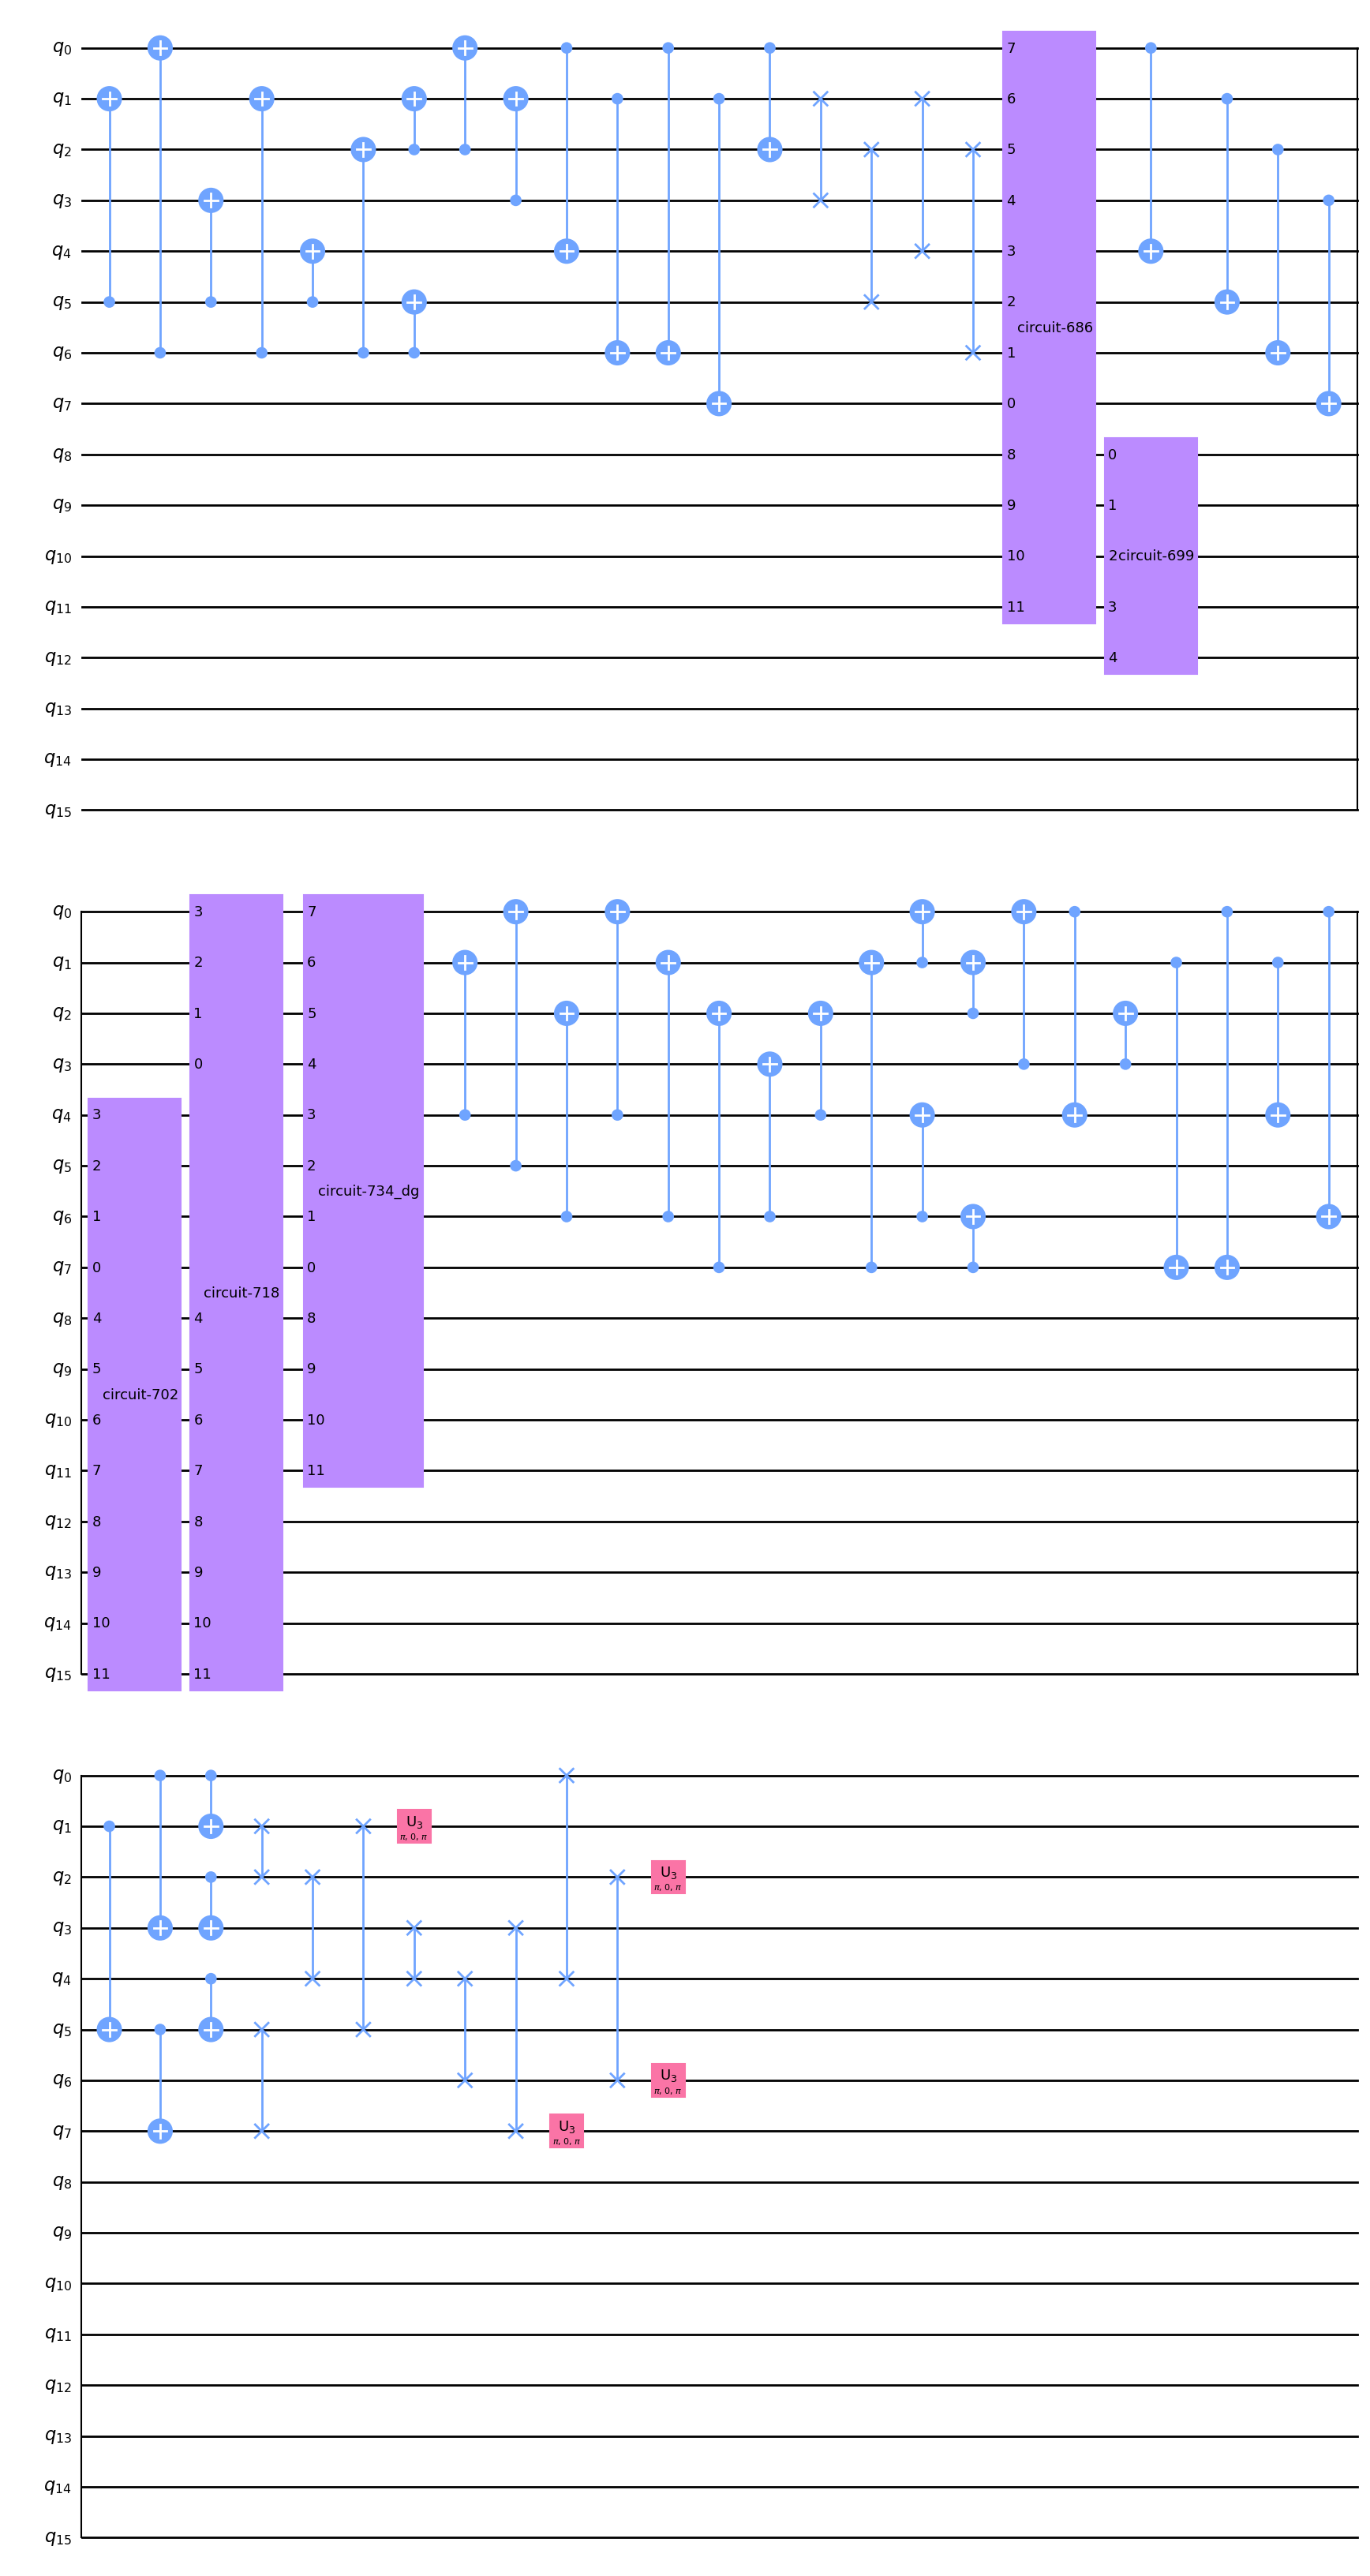

In [6]:
dd=SBox_circuit_3()
dd.draw('mpl')
dd.decompose().draw('mpl')